# Title: Bank Marketing (with social/economic context)

# Initializing and importing modules for exploratory analysis

In this section I load the main Python libraries for database manipulation and visualization. These are the libraries: Numpy, Pandas, Matplotlib and Seaborn.

In [8]:
import numpy as np   #Importing Numpy
import pandas as pd  #Importing Pandas

#Data visualization
import matplotlib    #Importing Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('font', size=16)                #Use big fonts and big plots
plt.rcParams['figure.figsize'] = (10.0,10.0)    
matplotlib.rc('figure', facecolor='white')

import seaborn as sns #Importing Seaborn

# Loading the database for exploratory analysis

I use the Pandas library to visualize the first rows and the columns of the database under study. The database is stored in the same folder as the project, so I only have to call it by using the basic command pandas.read_csv("path/to/file"). I print the header of the database, showing the first 5 rows and the columns.

In [9]:
dataframe = pd.read_csv('bank.csv') #Importing the database
dataframe.head() #Visualize the first 5 rows and the colunms of the database

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


# Exploratory analysis

First, I am going to check if there are missing values within the columns of the database. To that end, I build the function "check_missing_values" that takes as argument the database and gives as a result a dataframe with the name of the columns and the missing percent of values, let's say, the appearance frequency of the "NaN" symbol.

In [10]:
def check_missing_values(df,cols=None,axis=0):
    ### This function check out for missing values in each column
    ## Arguments:
                #df: data frame
                #cols: list. List of column names
                #axis: int. 0 means column and 1 means row
    
    # This function returns the missing info as a dataframe 
    
    if cols != None:
        df = df[cols]
    missing_num = df.isnull().sum(axis).to_frame().rename(columns={0:'missing_num'})
    missing_num['missing_percent'] = df.isnull().mean(axis)*100
    return missing_num.sort_values(by='missing_percent',ascending = False) 

check_missing_values(dataframe,cols=None,axis=0)

,missing_num,missing_percent
age,0,0.0
campaign,0,0.0
nr_employed,0,0.0
euribor3m,0,0.0
cons_conf_idx,0,0.0
cons_price_idx,0,0.0
emp_var_rate,0,0.0
poutcome,0,0.0
previous,0,0.0
pdays,0,0.0


,0,1
y,0.887346,0.112654


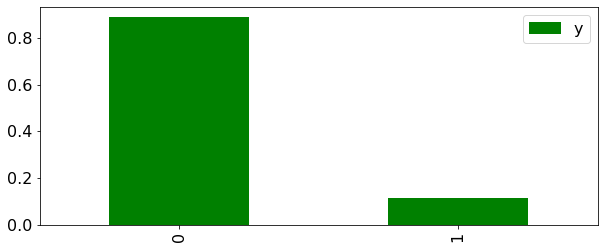

In [11]:
loan = dataframe["y"].value_counts(normalize=True).to_frame()
plt.rcParams['figure.figsize'] = (10.0, 4.0)    # ... and big plots
loan.plot.bar(color='g')
loan.T

In [12]:
def compare_category(df,colname,targetname):
    ### This function checks the target value difference of a given cathegory in the case
    ### of binary classifications.
    
    ## Arguments:
    # df: is a data frame.
    # colname: is a string. The column name to be evaluated.
    # targetname: is a string. The column name of the target variable.
    
    # caculate aggregate stats
    df_cate = df.groupby([colname])[targetname].agg(['count', 'sum', 'mean'])
    df_cate.reset_index(inplace=True)
    #print(df_cate)
    
    # plot visuals
    f, ax = plt.subplots(figsize=(20, 8))
    plt1 = sns.lineplot(x=colname, y="mean", data=df_cate,color="b")
    plt.xticks(size=20,rotation=90)
    plt.yticks(size=20,rotation=0)
    
    for tl in ax.get_yticklabels():
        tl.set_color('b')

    ax2 = ax.twinx()
    plt2 = sns.barplot(x=colname, y="count", data=df_cate,
                       ax=ax2,alpha=0.5)

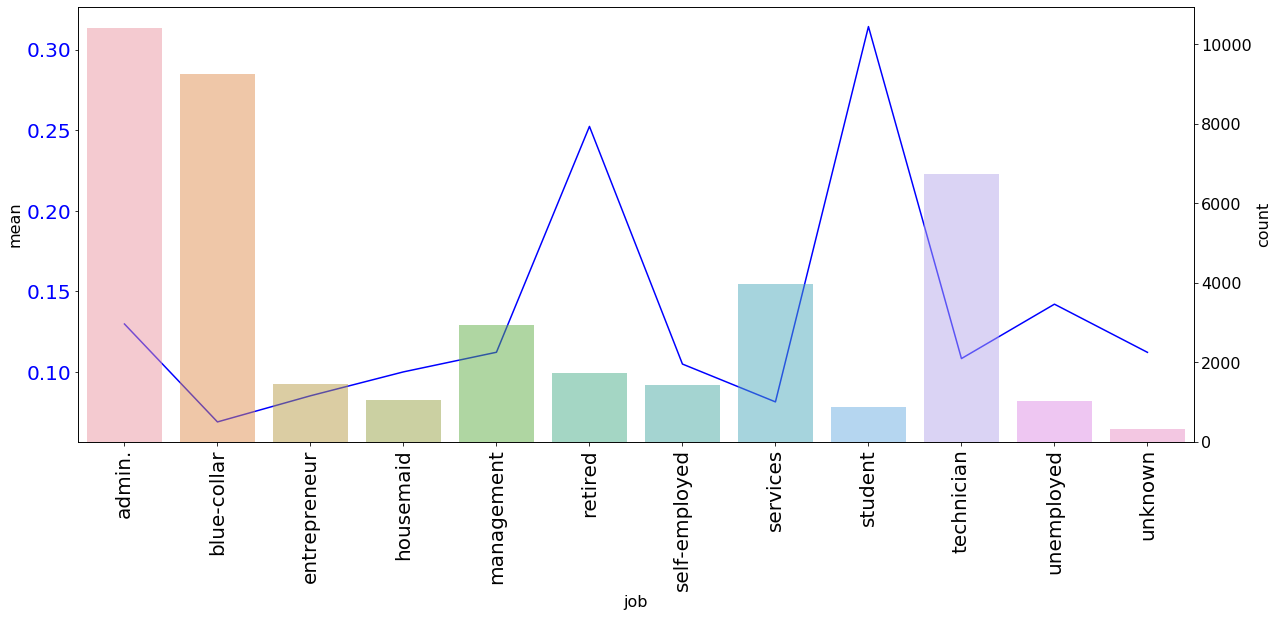

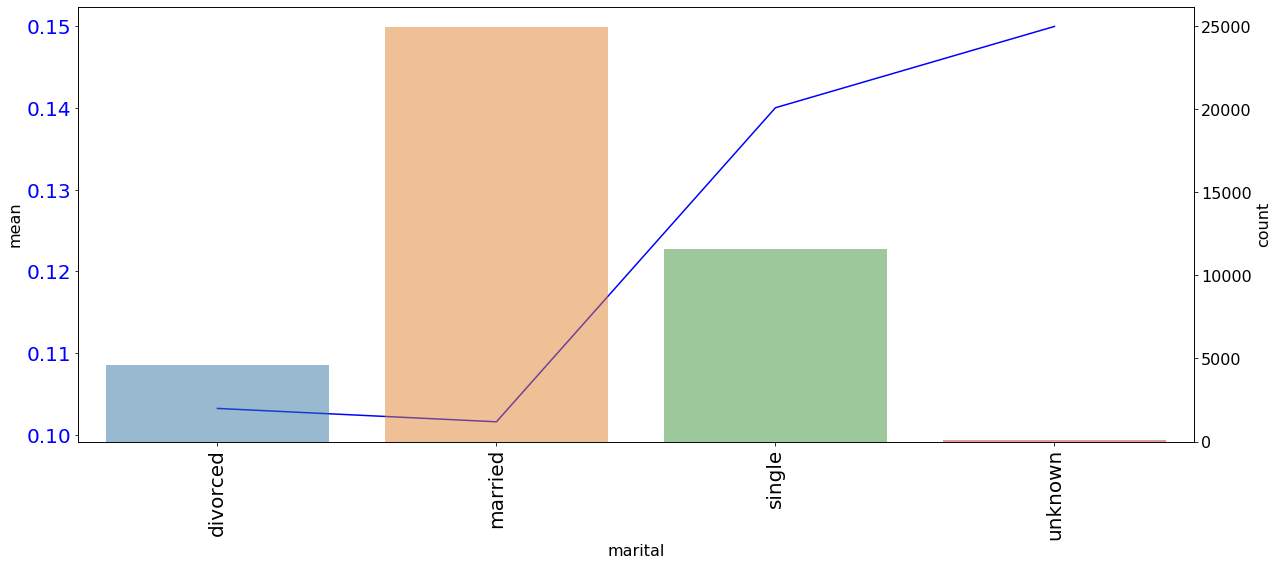

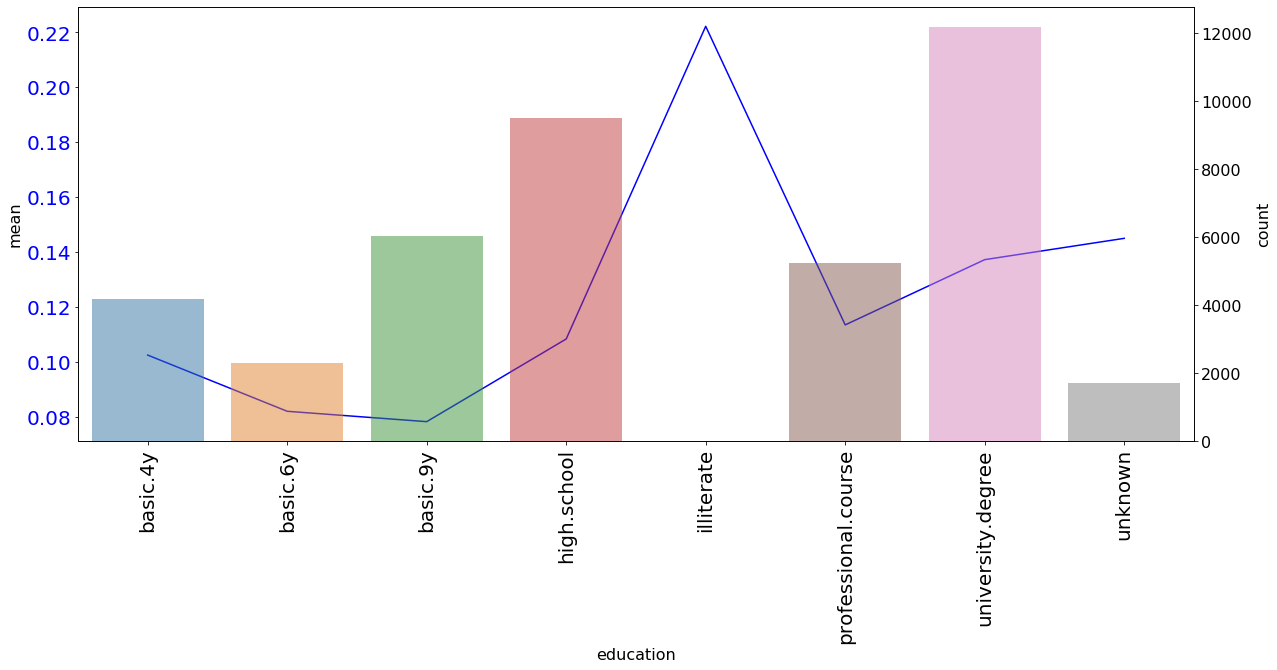

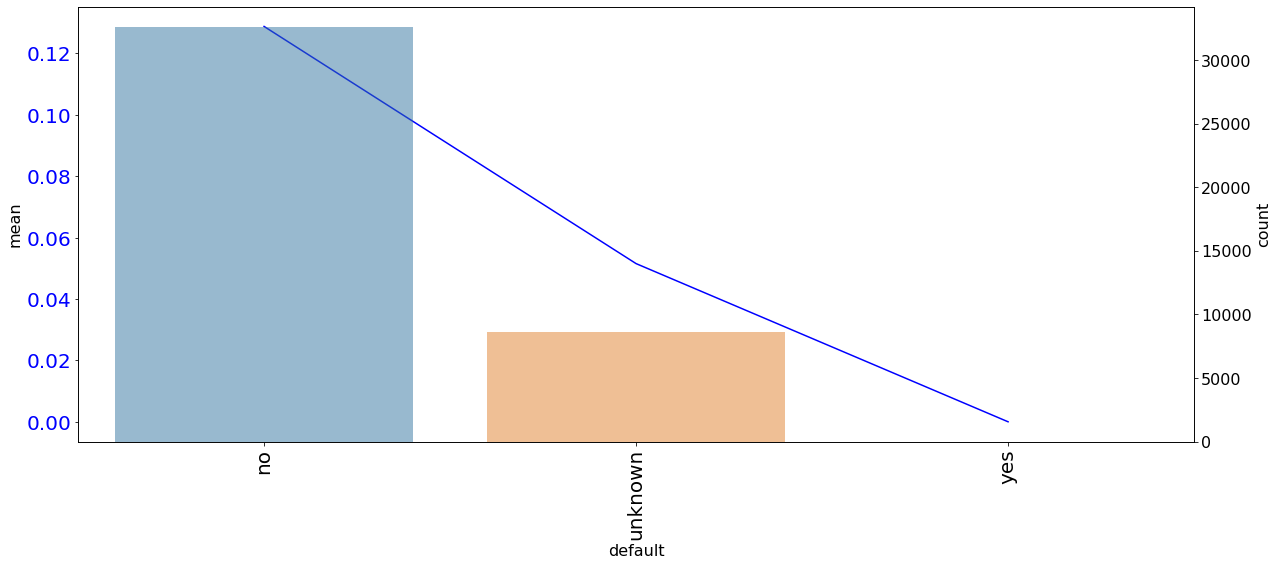

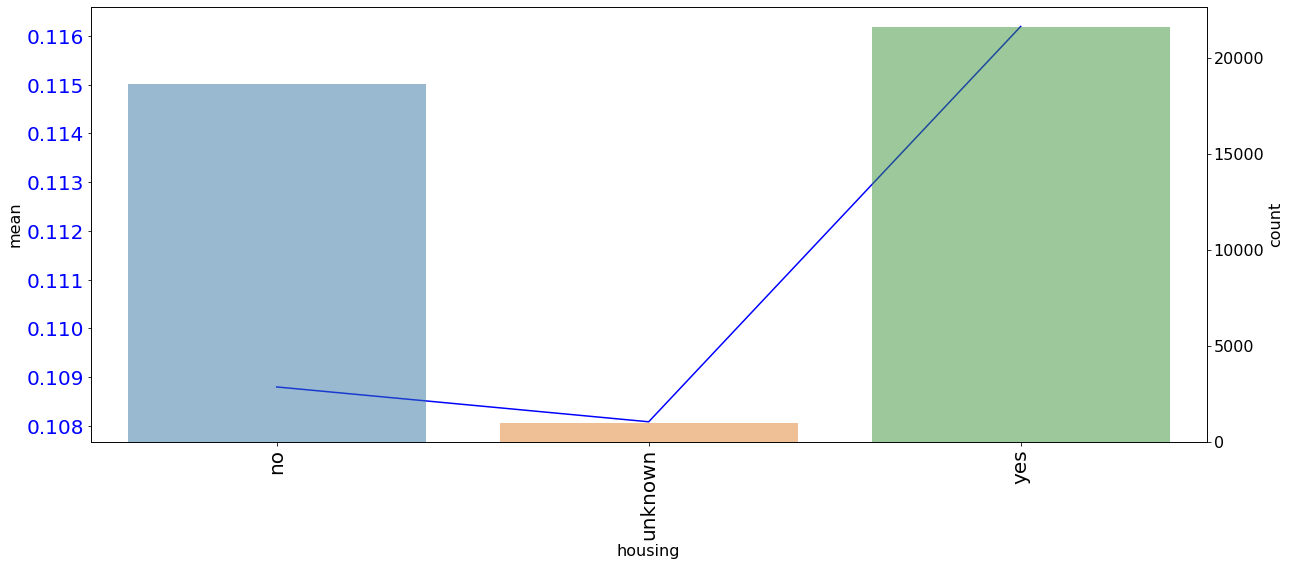

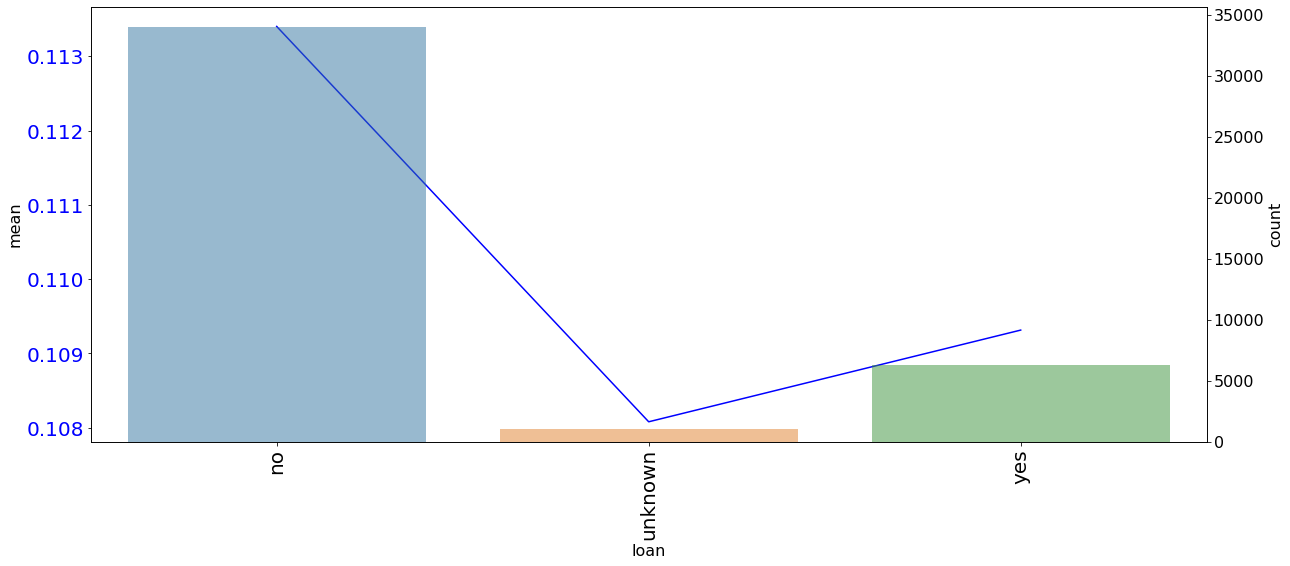

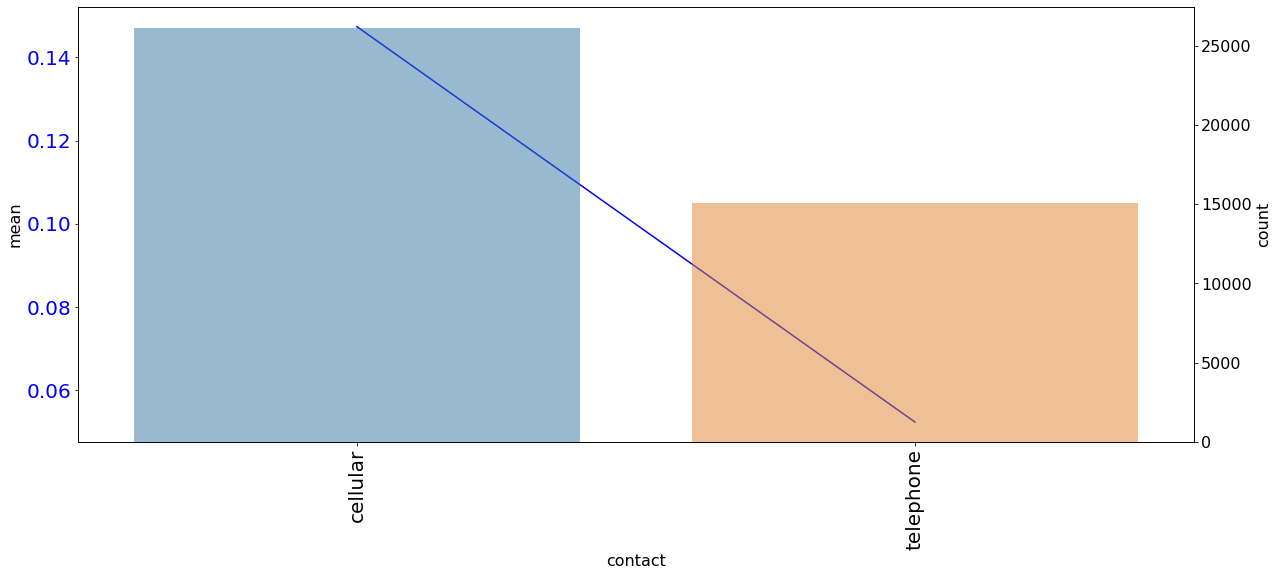

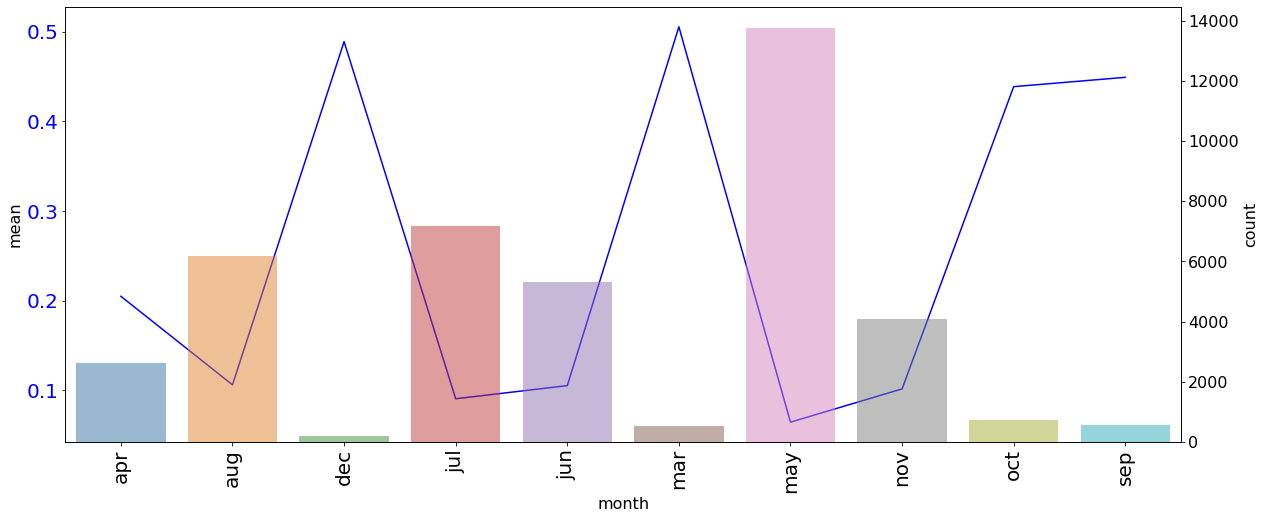

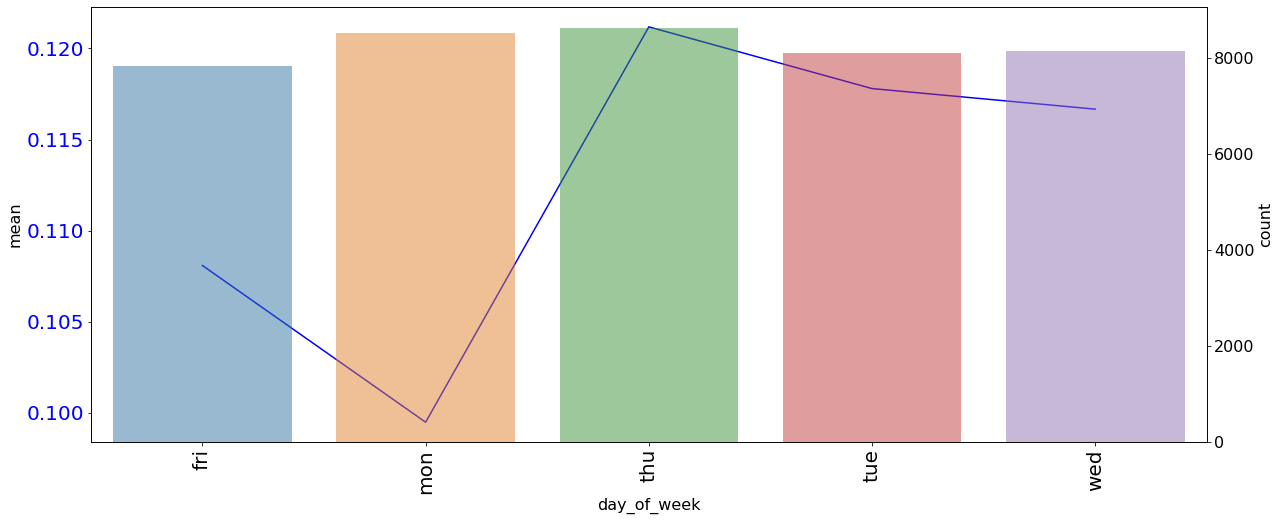

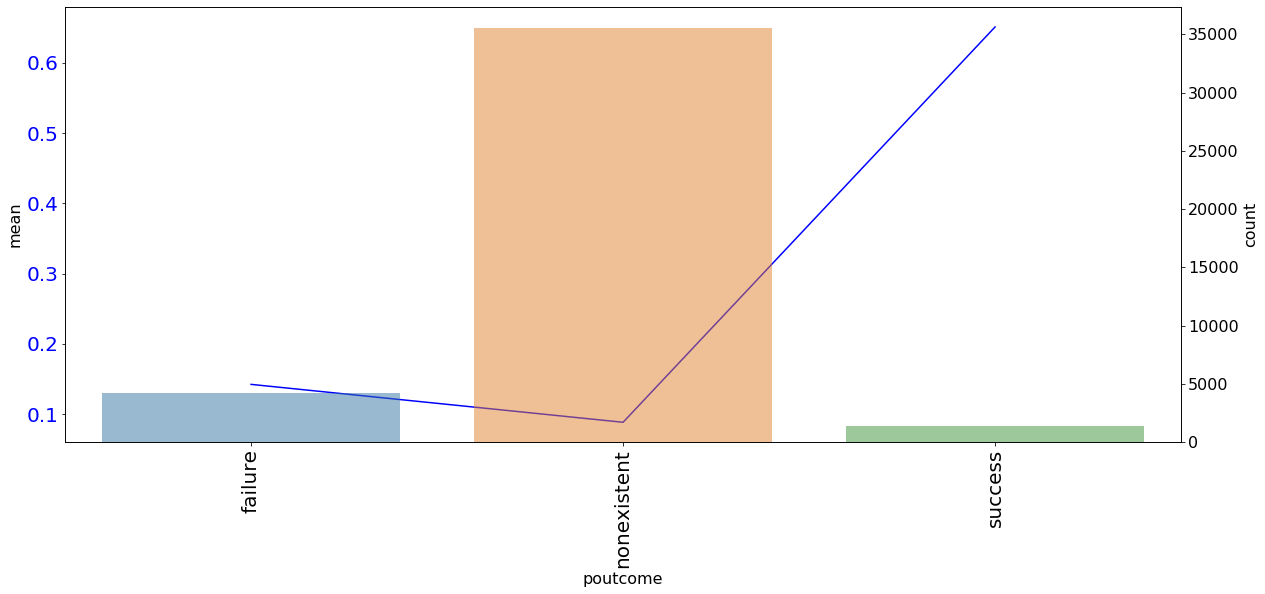

In [13]:
cat_vars = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
for el in cat_vars:
    compare_category(dataframe,el,"y")

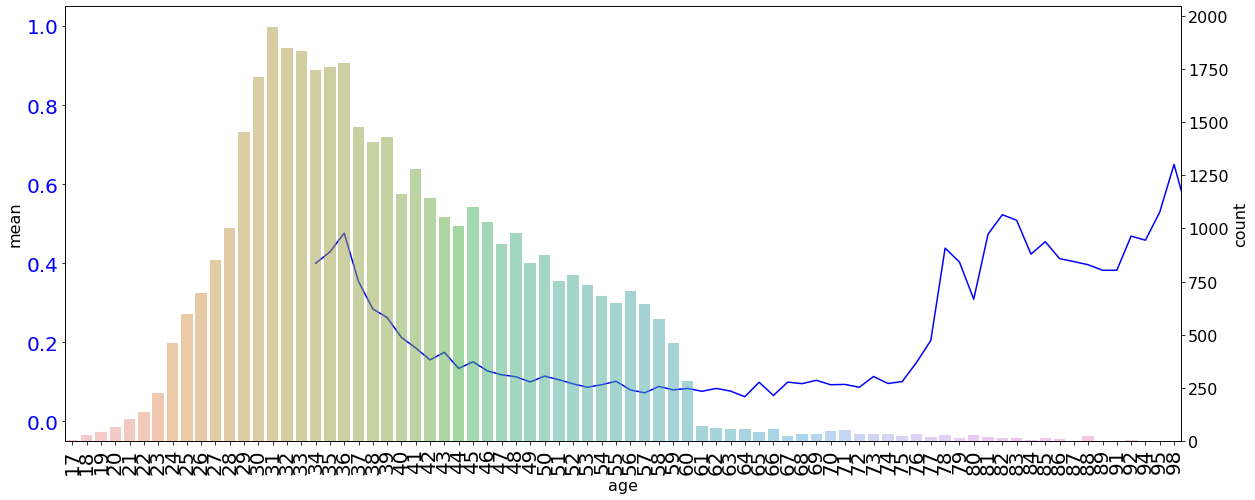

In [14]:
compare_category(dataframe,"age","y")

In [36]:
# Database cleaning and preparation for the analysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()


dataframe = pd.get_dummies(dataframe)


X_train, Y_train = dataframe.drop("y",axis=1), dataframe["y"]


#Scaling the dataset to have zero mean and a standard deviation of 1.
X_train = sc_X.fit_transform(X_train)

print([X_train.shape,Y_train.shape])

[(41188, 63), (41188,)]


# Subsection 3.2: Model Factory

In this subsection I propose a list of ML/DL algorithms to train and perform a cross-validation procedure, in order to get, depending on the quality of the data, the best performing algorithm.

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Ridge, ElasticNet, SGDClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

best_classifiers=[]

model_factory = [AdaBoostClassifier(), BaggingClassifier(), BayesianGaussianMixture(),
                 BernoulliNB(), CalibratedClassifierCV(), DecisionTreeClassifier(),
                 ElasticNet(), ExtraTreesRegressor(), GaussianMixture(), GaussianNB(),
                 GradientBoostingRegressor(), KNeighborsClassifier(),
                 LinearDiscriminantAnalysis(), LogisticRegression(),
                 LogisticRegressionCV(), MLPClassifier(), 
                 QuadraticDiscriminantAnalysis(), RandomForestClassifier(), Ridge(), SGDClassifier()
                 
]



for model in model_factory:
    model.seed = 42
    num_folds = 10
    
    scores = cross_val_score(model, X_train, Y_train, cv=num_folds, n_jobs=-1,scoring='neg_mean_squared_error')
    score_description = [model,'{model}'.format(model=model.__class__.__name__),"%0.5f" % abs(np.sqrt(scores.mean()*-1)), "%0.5f" % np.sqrt(scores.std() * 2)]
    best_classifiers.append(score_description)
    
best_model=pd.DataFrame(best_classifiers,columns=["algorithm","model","RSME","$\sigma$"]).sort_values("RSME",axis=0, ascending=True)
best_model=best_model.reset_index() 

In [43]:
best_model

,index,algorithm,model,RSME,$\sigma$
0,10,"GradientBoostingRegressor(alpha=0.9, ccp_alpha...",GradientBoostingRegressor,0.23821,0.05724
1,7,"ExtraTreesRegressor(bootstrap=False, ccp_alpha...",ExtraTreesRegressor,0.24941,0.06099
2,18,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,0.25385,0.06096
3,17,"RandomForestClassifier(bootstrap=True, ccp_alp...",RandomForestClassifier,0.29667,0.07306
4,13,"LogisticRegression(C=1.0, class_weight=None, d...",LogisticRegression,0.29805,0.07331
5,14,"LogisticRegressionCV(Cs=10, class_weight=None,...",LogisticRegressionCV,0.29818,0.07149
6,0,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",AdaBoostClassifier,0.29964,0.08137
7,4,"CalibratedClassifierCV(base_estimator=None, cv...",CalibratedClassifierCV,0.29972,0.07252
8,12,"LinearDiscriminantAnalysis(n_components=None, ...",LinearDiscriminantAnalysis,0.30065,0.06925
9,1,"BaggingClassifier(base_estimator=None, bootstr...",BaggingClassifier,0.30314,0.06137


CPU times: user 6.42 s, sys: 12.3 ms, total: 6.43 s
Wall time: 6.51 s
CPU times: user 80 ms, sys: 0 ns, total: 80 ms
Wall time: 80.8 ms
              precision    recall  f1-score   support

           0     0.9423    0.9701    0.9560     36548
           1     0.6936    0.5323    0.6024      4640

    accuracy                         0.9208     41188
   macro avg     0.8180    0.7512    0.7792     41188
weighted avg     0.9143    0.9208    0.9162     41188



Text(51.760000000000005, 0.5, 'Actual')

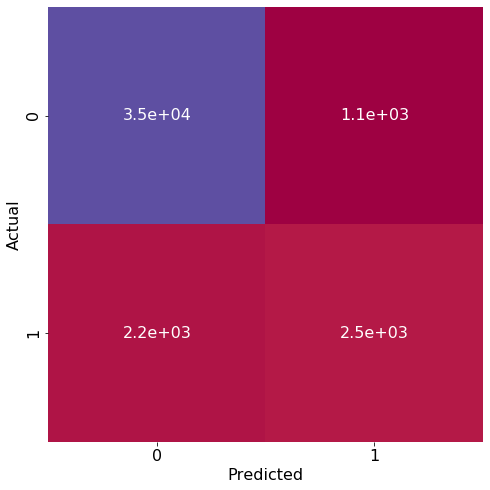

In [44]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report 


classifier = best_model["algorithm"][0]
%time classifier.fit(X_train, Y_train)
%time Y_pred_algo = classifier.predict(X_train)
Y_pred_algo = np.where(Y_pred_algo > 0.5, 1, 0)

print(classification_report(Y_train, Y_pred_algo,digits=4))

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(Y_train, Y_pred_algo), annot=True, square=True, cmap = 'Spectral', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Light Gradient Boosting algorithm

              precision    recall  f1-score   support

           0     1.0000    0.9634    0.9814     36548
           1     0.7762    1.0000    0.8740      4640

    accuracy                         0.9675     41188
   macro avg     0.8881    0.9817    0.9277     41188
weighted avg     0.9748    0.9675    0.9693     41188



Text(51.760000000000005, 0.5, 'Actual')

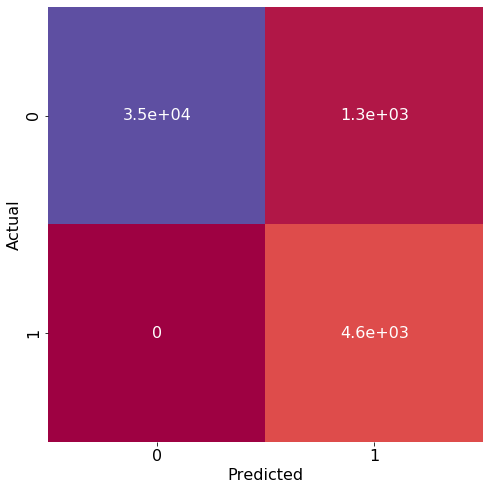

In [45]:
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# For this task we use a simple set of parameters to train the model. 
# I just want to create a baseline model, so I am not performing here cross validation or parameter tunning.

lgb_train = lgb.Dataset(X_train, Y_train, free_raw_data=False)
lgb_test = lgb.Dataset(X_train, Y_train, reference=lgb_train, free_raw_data=False)

parameters = {'num_leaves': 2**8,
              'learning_rate': 0.1,
              'is_unbalance': True,
              'min_split_gain': 0.1,
              'min_child_weight': 1,
              'reg_lambda': 1,
              'subsample': 1,
              'objective':'binary',
              #'device': 'gpu', # comment this line if you are not using GPU
              'task': 'train'
              }
num_rounds = 300


clf = lgb.train(parameters, lgb_train, num_boost_round=num_rounds)

Y_pred_lgb = clf.predict(X_train)
Y_pred_lgb = np.where(Y_pred_lgb > 0.5, 1, 0)

print(classification_report(Y_train, Y_pred_lgb,digits=4))

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(Y_train, Y_pred_lgb), annot=True, square=True, cmap = 'Spectral', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Artificial Neural Networks

              precision    recall  f1-score   support

           0     0.9557    0.9623    0.9590     36548
           1     0.6861    0.6487    0.6669      4640

    accuracy                         0.9270     41188
   macro avg     0.8209    0.8055    0.8129     41188
weighted avg     0.9253    0.9270    0.9261     41188



Text(51.760000000000005, 0.5, 'Actual')

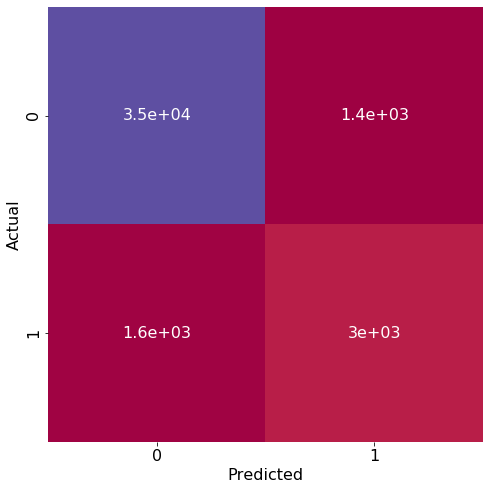

In [51]:
import keras
from keras.models import Sequential
from keras.layers import Dense# Initialising the ANN
"Activation functions: 'sigmoid', 'tanh', 'relu'"
classifier = Sequential()# Adding the input layer and the first hidden layer
classifier.add(Dense(units =15 , kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])# Fitting the ANN to the Training set
classifier.fit(X_train, Y_train, batch_size = 32, epochs = 150, verbose=0)

# Predicting the Test set results
Y_pred_ann = classifier.predict(X_train)
Y_pred_ann = (Y_pred_ann > 0.5)


print(classification_report(Y_train, Y_pred_ann,digits=4))

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(Y_train, Y_pred_ann), annot=True, square=True, cmap = 'Spectral', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Conclusions

Comparing the algorithms above used with respect to their accuracy goals and confusion matrices, the Light Gradient Boosting does the best job at predicting which client is most likely to subscribe a bank long term deposit.